In [1]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import profile
import time

from profile import run
from itertools import permutations

%matplotlib inline

In [2]:
def make_cities(n, max_height=600, max_width=400, seed=1000):
    """Returns list of n cities (points) within a *max_height* by *max_width* 
    grid."""
    random.seed(n * seed)
    return [complex(random.randrange(max_height), random.randrange(max_width))
            for i in range(n)]

In [3]:
def plot_route(route):
    """Given a route, plots the route end to end."""
    plot_lines(list(route) + [route[0]])

In [4]:
def plot_lines(points, style='gs-', display=True):
    """Given a set of points, plots the points."""
    plt.plot([X(p) for p in points], [Y(p) for p in points], style)
    plt.axis('scaled'); plt.axis('off')
    if display: print('Route distance:', route_length(points))

In [5]:
def X(point): return point.real
def Y(point): return point.imag

def distance(A, B):
    """Returns the distance between two points."""
    return abs(A - B)

In [6]:
def route_length(route):
    """Returns the total length of a route."""
    return sum(distance(route[i], route[i-1]) for i, n in enumerate(route))

In [7]:
cities_6 = make_cities(6)

('Route distance:', 1739.1918969943874)


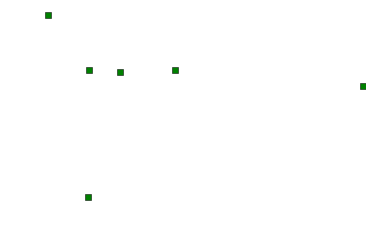

In [8]:
plot_lines(cities_6, 'gs')

('Route distance:', 1739.1918969943877)


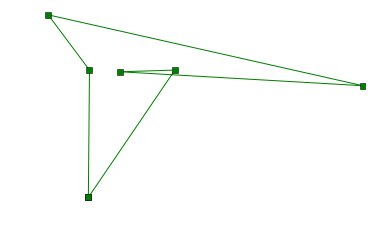

In [9]:
plot_route(cities_6)

That obviously doesn't look like the most optimal solution. This makes sense as essentially we're still taking the random approach. Let's take the brute-force approach and determine the shortest route by enumerating all routes.

In [10]:
def all_routes(points):
    """Given a set of points, returns all possible routes between points."""
    return [route for route in permutations(points, len(points))]

In [11]:
def shortest_route(routes, using=route_length):
    """Returns the shortest route list of routes, using *key* function (default route_length)."""
    return min(routes, key=route_length)

('Route distance:', 1480.8188030586539)


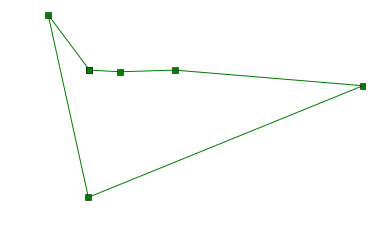

In [12]:
plot_route(shortest_route(all_routes(cities_6)))

Much better! Let's see what timing looks like for the above.

('Route distance:', 1480.8188030586539)
Wall time: 85 ms


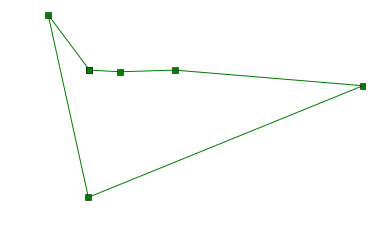

In [13]:
%time plot_route(shortest_route(all_routes(cities_6)))

Let's see how we do with more cities

('Route distance:', 1181.29943528004)
Wall time: 138 ms


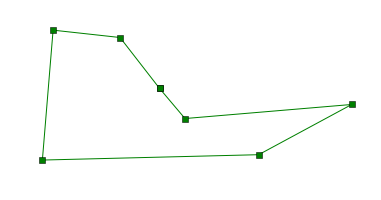

In [14]:
%time plot_route(shortest_route(all_routes(make_cities(7))))

('Route distance:', 1408.0148097692647)
Wall time: 315 ms


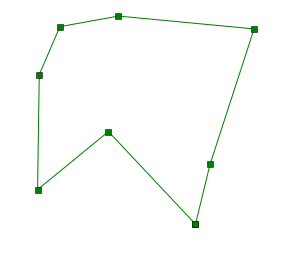

In [15]:
%time plot_route(shortest_route(all_routes(make_cities(8))))

('Route distance:', 1095.5809004566104)
Wall time: 1.78 s


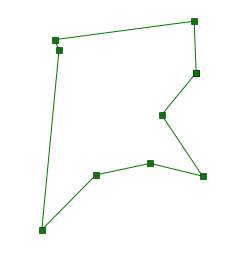

In [16]:
%time plot_route(shortest_route(all_routes(make_cities(9))))

('Route distance:', 1726.9011255761563)
Wall time: 18.6 s


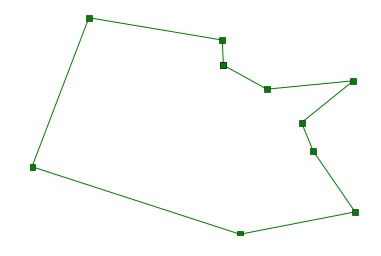

In [18]:
%time plot_route(shortest_route(all_routes(make_cities(10))))

The amount of time using the brute force approach is directly proportional to the number of cities (O[n!]). Let's see how long it would take our algorithm to solve for larger sets of cities.

In [34]:
def predict(n):
    """Predicts time to brute force TS problem for :n: cities."""
    fact_n = reduce(lambda x, y: x*y, range(1, n+1))
    fact_10 = reduce(lambda x, y: x*y, range(1, 11))
    time_for_10_cities = 18.6
    return fact_n / fact_10 * time_for_10_cities

In [40]:
{r'{} Cities takes {} seconds'.format(n, predict(n))
 for n in range(10,16)}

{'10 Cities takes 18.6 seconds',
 '11 Cities takes 204.6 seconds',
 '12 Cities takes 2455.2 seconds',
 '13 Cities takes 31917.6 seconds',
 '14 Cities takes 446846.4 seconds',
 '15 Cities takes 6702696.0 seconds'}

15 cities would take an an estimated 77 days to brute force, let alone 25 or 50 or 100 cities. Obviously we need a better solution.

Next, we'll try an approximation algorithm to solve the TSP problem more efficiently.